In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Crear y conectar la base de datos
conn = sqlite3.connect('DB_Propia.db')  # Crea una base de datos local en SQLite
cursor = conn.cursor()

# Crear las tablas solo si no existen
cursor.execute('''
CREATE TABLE IF NOT EXISTS Tabla1 (
    id INT PRIMARY KEY,
    nombre VARCHAR(50)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Tabla2 (
    id INT PRIMARY KEY,
    edad INT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Tabla3 (
    id INT PRIMARY KEY,
    descripcion VARCHAR(100)
)
''')

# Insertar registros solo si no existen datos en las tablas
cursor.execute('SELECT COUNT(*) FROM Tabla1')
if cursor.fetchone()[0] == 0:  # Si la tabla está vacía
    cursor.executemany('INSERT INTO Tabla1 (id, nombre) VALUES (?, ?)', 
                       [(i, f'Nombre_{i}') for i in range(1, 11)])

cursor.execute('SELECT COUNT(*) FROM Tabla2')
if cursor.fetchone()[0] == 0:  # Si la tabla está vacía
    cursor.executemany('INSERT INTO Tabla2 (id, edad) VALUES (?, ?)', 
                       [(i, 20 + i) for i in range(1, 11)])

cursor.execute('SELECT COUNT(*) FROM Tabla3')
if cursor.fetchone()[0] == 0:  # Si la tabla está vacía
    cursor.executemany('INSERT INTO Tabla3 (id, descripcion) VALUES (?, ?)', 
                       [(i, f'Descripcion_{i}') for i in range(1, 11)])

# Confirmar los cambios y cerrar la conexión
conn.commit()
conn.close()

print("Base de datos creada, tablas verificadas y datos insertados.")


Base de datos creada, tablas verificadas y datos insertados.


In [4]:
# Leer el archivo CSV en un DataFrame
df = pd.read_csv(r'C:\Users\abrah\Documents\Primer_semestre_MCD\ClasePython\Clase_11\maraton_ny.csv')

# Conectar a la base de datos
conn = sqlite3.connect('DB_Propia.db')

# Importar los datos a una nueva tabla
df.to_sql('MaratonNY', conn, if_exists='replace', index=False)

conn.close()
print("Datos del Maratón NY importados exitosamente.")

print(df.head())

Datos del Maratón NY importados exitosamente.
   Corredor  place  gender  age home        time
0      3475   3592    Male   52  GBR  217.483333
1     13594  13853  Female   40   NY  272.550000
2     12012  12256    Male   31  FRA  265.283333
3     10236  10457  Female   33   MI  256.150000
4      9476   9686    Male   33   NY  252.250000


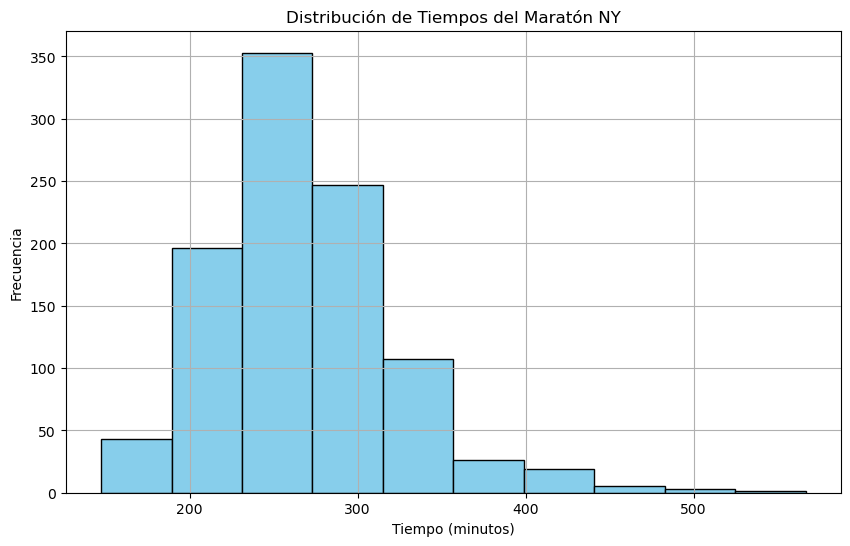

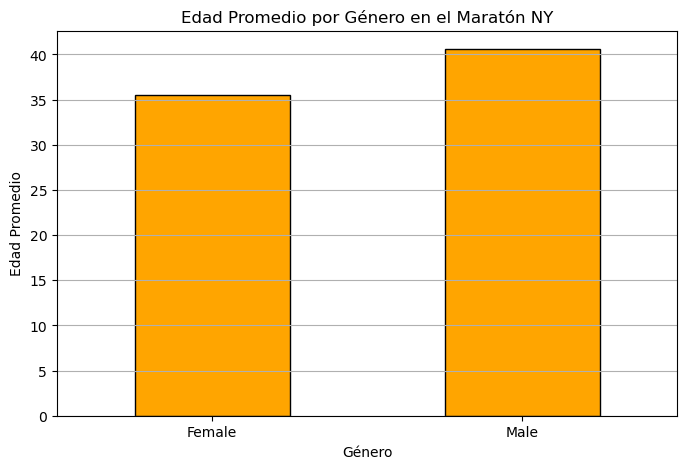

In [5]:
# Conectar a la base de datos y cargar datos
conn = sqlite3.connect('DB_Propia.db')
df = pd.read_sql_query('SELECT * FROM MaratonNY', conn)
conn.close()

# 1. Histograma de tiempos (`time`)
plt.figure(figsize=(10, 6))
plt.hist(df['time'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Tiempos del Maratón NY')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 2. Gráfico de barras para la edad promedio por género (`gender` y `age`)
df_grouped = df.groupby('gender')['age'].mean()

plt.figure(figsize=(8, 5))
df_grouped.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Edad Promedio por Género en el Maratón NY')
plt.xlabel('Género')
plt.ylabel('Edad Promedio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# TAREA 14

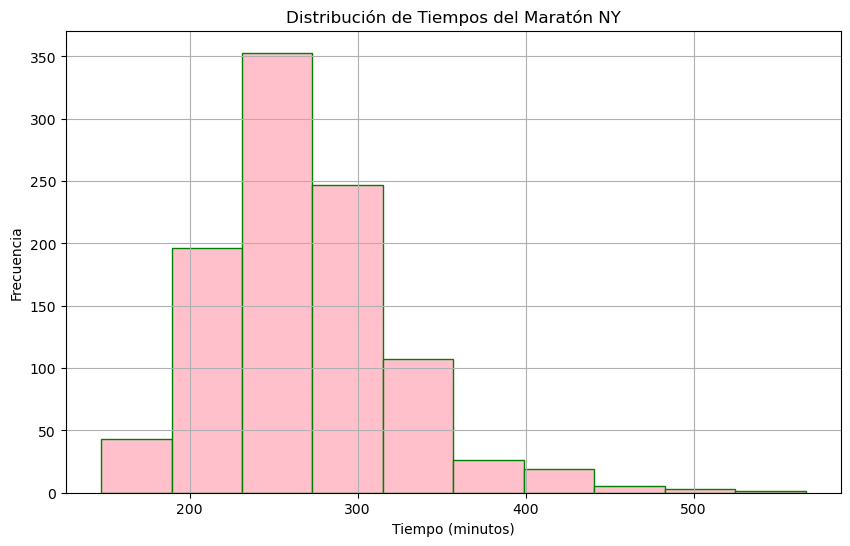

In [11]:
############################ AQUÍ EMPIEZA LA TAREA 14 ################################

# Conectar a la base de datos y cargar datos
conn = sqlite3.connect('DB_Propia.db')
df = pd.read_sql_query('SELECT * FROM MaratonNY', conn)
conn.close()

# 1. Histograma de tiempos (`time`)
plt.figure(figsize=(10, 6))
plt.hist(df['time'], bins=10, color='pink', edgecolor='green')
plt.title('Distribución de Tiempos del Maratón NY')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

